In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
#Carga de CSVs
train_df = pd.read_csv("../Preprocesamiento/train_preproc.csv",sep=',',encoding='UTF-8')

In [3]:
X = train_df.iloc[:,:-1]
Y = train_df['Reached.on.Time_Y.N'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42) 

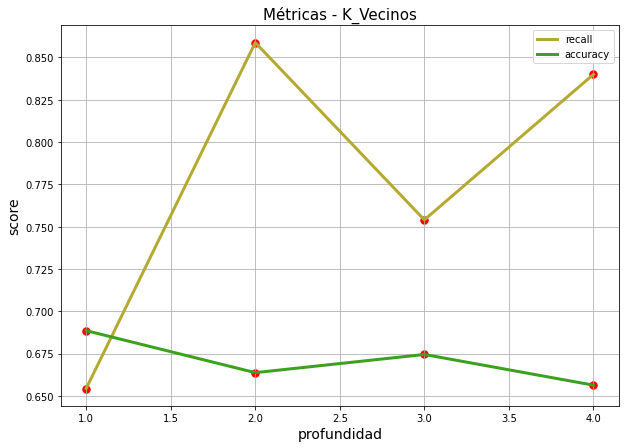

El mayor recall es de:  0.8587699316628702 
Con una cantidad de vecinos de: 2

La mayor precisión es de:  0.6885185185185185 
Con una cantidad de vecinos de: 1


In [4]:
#Creamos el registro de scores para el árbol de decision
profundidad = []
recall_ = []
accura_ = []
for i in range(1,5):
    #print()
    clf = SVC(kernel='poly', random_state=42,degree=i,C=200)
    # Entrenamos
    clf.fit(X_train,y_train)
    # Predecimos
    y_pred = clf.predict(X_test)
    # Evaluamos
    score = recall_score(y_test,y_pred)
    recall_.append(score)
    score = accuracy_score(y_test,y_pred)
    accura_.append(score)
    profundidad.append(i)

#Graficamos
plt.figure(figsize=(10,7))
plt.title('Métricas - K_Vecinos', fontsize=15)

plt.plot(profundidad,recall_, lw=3,label='recall',c='#B4AA31')
plt.scatter(profundidad, recall_,s=55,c='r')



plt.scatter(profundidad, accura_,s=55,c='r')
plt.plot(profundidad,accura_, lw=3,label='accuracy',c='#3CA11F')

plt.ylabel('score',fontsize=14)
plt.xlabel('profundidad',fontsize=14)
plt.legend()
plt.grid()
plt.show()

prof_max_recall = 0
prof_max_accur = 0
for i in range(0,len(profundidad)): 
    if recall_[i] ==  np.asarray(recall_).max():
        prof_max_recall = i + 1
    if accura_[i] == np.asarray(accura_).max():
        prof_max_accur = i + 1

print("El mayor recall es de: ", np.asarray(recall_).max(),'\nCon una cantidad de vecinos de:', prof_max_recall)
print("\nLa mayor precisión es de: ", np.asarray(accura_).max(),'\nCon una cantidad de vecinos de:', prof_max_accur)

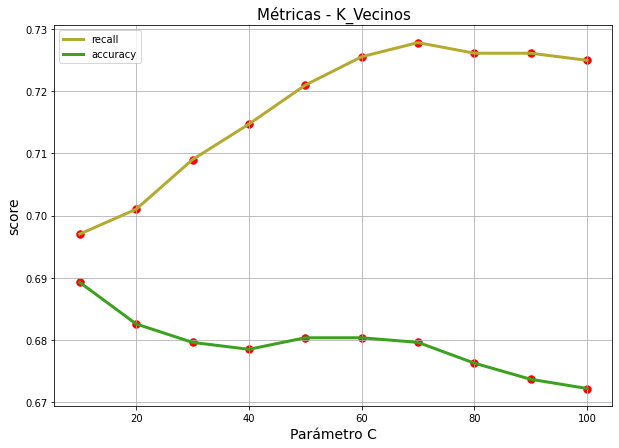

El mayor recall es de:  0.7277904328018223 
Con un parámetro C de: 7

La mayor precisión es de:  0.6892592592592592 
Con un parámetro C de: 1


In [5]:
#Creamos el registro de scores para el árbol de decision
profundidad = []
recall_ = []
accura_ = []
for i in range(1,11):
    clf = SVC(C= i*10, gamma= 0.5, kernel= 'rbf')
    # Entrenamos
    clf.fit(X_train,y_train)
    # Predecimos
    y_pred = clf.predict(X_test)
    # Evaluamos
    score = recall_score(y_test,y_pred)
    recall_.append(score)
    score = accuracy_score(y_test,y_pred)
    accura_.append(score)
    profundidad.append(i*10)

#Graficamos
plt.figure(figsize=(10,7))
plt.title('Métricas - K_Vecinos (gamma=0.5)', fontsize=15)

plt.plot(profundidad,recall_, lw=3,label='recall',c='#B4AA31')
plt.scatter(profundidad, recall_,s=55,c='r')



plt.scatter(profundidad, accura_,s=55,c='r')
plt.plot(profundidad,accura_, lw=3,label='accuracy',c='#3CA11F')

plt.ylabel('score',fontsize=14)
plt.xlabel('Parámetro C',fontsize=14)
plt.legend()
plt.grid()
plt.show()

prof_max_recall = 0
prof_max_accur = 0
for i in range(0,len(profundidad)): 
    if recall_[i] ==  np.asarray(recall_).max():
        prof_max_recall = i + 1
    if accura_[i] == np.asarray(accura_).max():
        prof_max_accur = i + 1

print("El mayor recall es de: ", np.asarray(recall_).max(),'\nCon un parámetro C de:', prof_max_recall)
print("\nLa mayor precisión es de: ", np.asarray(accura_).max(),'\nCon un parámetro C de:', prof_max_accur)

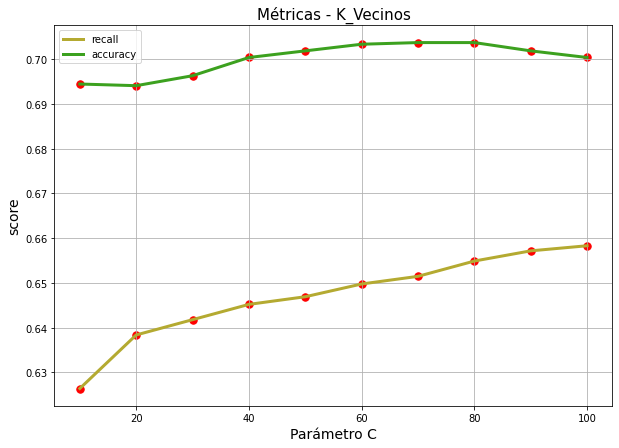

El mayor recall es de:  0.6583143507972665 
Con un parámetro C de: 100

La mayor precisión es de:  0.7037037037037037 
Con un parámetro C de: 80


In [6]:
#Creamos el registro de scores para el árbol de decision
profundidad = []
recall_ = []
accura_ = []
for i in range(1,11):
    clf = SVC(C= i*10, gamma= 0.1, kernel= 'rbf')
    # Entrenamos
    clf.fit(X_train,y_train)
    # Predecimos
    y_pred = clf.predict(X_test)
    # Evaluamos
    score = recall_score(y_test,y_pred)
    recall_.append(score)
    score = accuracy_score(y_test,y_pred)
    accura_.append(score)
    profundidad.append(i*10)

#Graficamos
plt.figure(figsize=(10,7))
plt.title('Métricas - K_Vecinos (gamma=0.1)', fontsize=15)

plt.plot(profundidad,recall_, lw=3,label='recall',c='#B4AA31')
plt.scatter(profundidad, recall_,s=55,c='r')



plt.scatter(profundidad, accura_,s=55,c='r')
plt.plot(profundidad,accura_, lw=3,label='accuracy',c='#3CA11F')

plt.ylabel('score',fontsize=14)
plt.xlabel('Parámetro C',fontsize=14)
plt.legend()
plt.grid()
plt.show()

prof_max_recall = 0
prof_max_accur = 0
for i in range(0,len(profundidad)): 
    if recall_[i] ==  np.asarray(recall_).max():
        prof_max_recall = i + 1
    if accura_[i] == np.asarray(accura_).max():
        prof_max_accur = i + 1

print("El mayor recall es de: ", np.asarray(recall_).max(),'\nCon un parámetro C de:', prof_max_recall*10)
print("\nLa mayor precisión es de: ", np.asarray(accura_).max(),'\nCon un parámetro C de:', prof_max_accur*10)

In [13]:
# Hyperparameter search space
search_space = {
    'kernel': ['rbf'],
    'C': [10, 20, 30, 40, 50, 60, 70, 80,90, 100],
    'gamma': [0.1, 0.5, 0.8]
}
svc_ = SVC()
# Probamos la estrategia grid search
from sklearn.model_selection import GridSearchCV #cv: cross validation
# Le pasamos la grilla que creamos
model = GridSearchCV(svc_, param_grid=search_space, cv=5)
# Entrenamos
model.fit(X_train,y_train)
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores hiperparámetros: {'C': 40, 'gamma': 0.1, 'kernel': 'rbf'}
Mejor Score: 0.6920134397417955



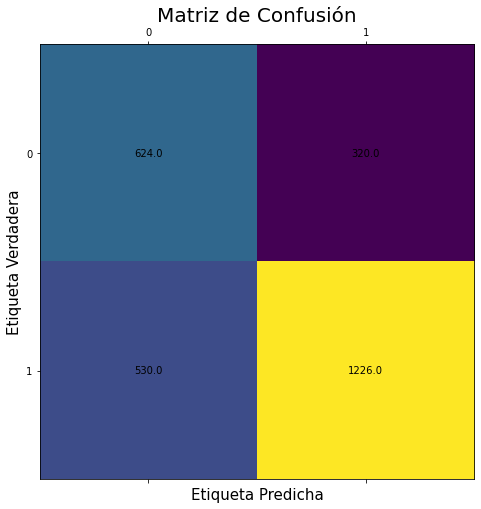

In [16]:
clf = SVC(C= 10000, gamma= 0.1, kernel= 'rbf')
# Entrenamos
clf.fit(X_train,y_train)
# Predecimos
y_pred = clf.predict(X_test)
# Matriz de confusión 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [86]:
error_score='raise'
# Hyperparameter search space
search_space = {
    'kernel': ['sigmoid'],
    'coef0':[0.1,0.5,3],
    'C': [0.1, 1,10],
    'gamma': [0,0.1,1,10]
}
svc_ = SVC()
# Probamos la estrategia grid search
from sklearn.model_selection import GridSearchCV #cv: cross validation
# Le pasamos la grilla que creamos
model = GridSearchCV(svc_, param_grid=search_space, cv=5)
# Entrenamos
model.fit(X_train,y_train)
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

C:\Users\marco\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\marco\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\marco\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py", line 237, in fit
    raise ValueError(msg)
ValueError: gamma value must be > 0; 0 is invalid. Use a positive number or use 'auto' to set gamma to a value of 1 / n_features.

  wa

Mejores hiperparámetros: {'C': 1, 'coef0': 3, 'gamma': 0.1, 'kernel': 'sigmoid'}
Mejor Score: 0.6621715395186404

